In [1]:
# %load_ext autoreload
# %autoreload 2
import numpy as np
from pathlib import Path
from typing import Optional
from truecolorhsi.visualization import vanilla_visualization, colorimetric_visualization
from truecolorhsi.accessories import read_HSI_data


This notebook uses an exemplary version of the dataset [Heidelberg Porcine HyperSPECTRAL Imaging Dataset](https://heiporspectral.org/) 

In [2]:
input_path = Path("/home/fzhcis/mylab/data/HeiPorSPECTRAL_example/data/subjects/P086/2021_04_15_09_22_02") / "2021_04_15_09_22_02_SpecCube.dat"
hyperspec_cube, band_centers = read_HSI_data(input_path)
print(f"(height, width, channels) = {hyperspec_cube.shape}")
print(f"{hyperspec_cube.dtype = }")
print(type(hyperspec_cube))

(height, width, channels) = (480, 640, 100)
hyperspec_cube.dtype = dtype('float32')
<class 'numpy.ndarray'>


=============Vanilla Visualization===============
- RGB bands extracted from the hyperspectral image.
  Aggregated bands: 
    blue	[530-555 nm] 
    green	[540-585 nm] 
    red		[585-720 nm]
- Percentile stretching applied to the RGB image. (%2)
- CLAHE applied to the RGB image.
Writing to:  /home/fzhcis/mylab/data/HeiPorSPECTRAL_example/data/subjects/P086/2021_04_15_09_22_02/outputs/Visualization_from_rgb_bands.jpg


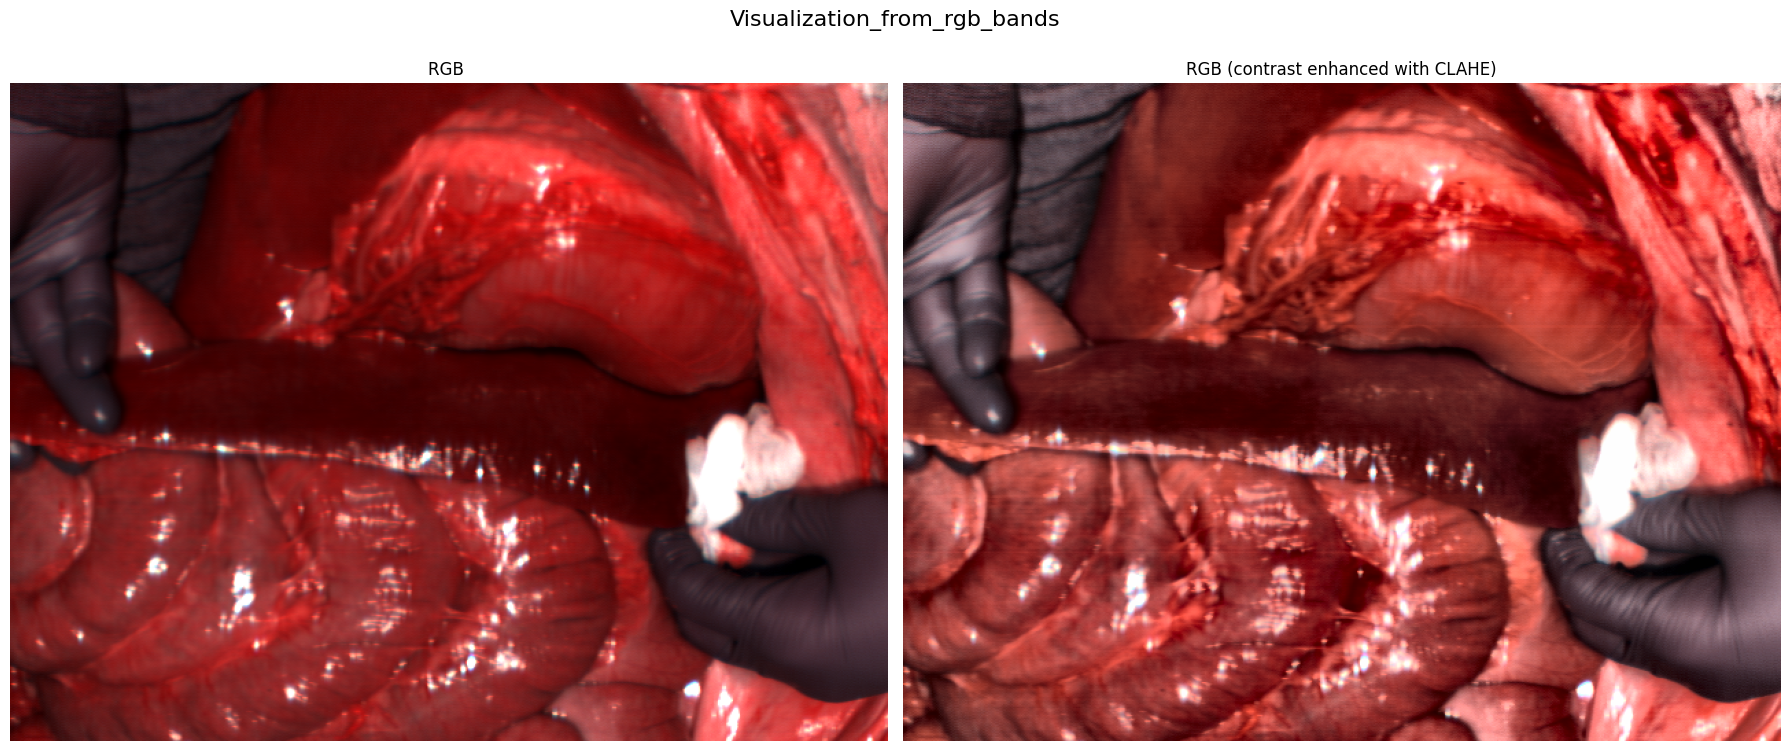

In [3]:
rgb_display_images = vanilla_visualization(input_path,
                                            visualize=True,
                                            stretch_percent=2,
                                            saveimages=True,
                                            savefolder = None)

=============Colorimetirc Visualization===============
IMAGE rows, cols, bands: (480, 640, 100)
Bands used for colorimetric conversion: [500 505 510 515 520 525 530 535 540 545 550 555 560 565 570 575 580 585
 590 595 600 605 610 615 620 625 630 635 640 645 650 655 660 665 670 675
 680 685 690 695 700 705 710 715 720 725 730 735 740 745 750 755 760 765
 770 775 780 785 790 795 800 805 810 815 820 825]
- Reflectance data converted to XYZ tristimulus values.
- XYZ tristimulus values normalized to fit into the sRGB range.
- XYZ tristimulus values converted to sRGB.
- sRGB values clipped to fit into the displayable range.
- Percentile stretching applied to the sRGB image. (%2)
- CLAHE applied to the sRGB image.
Writing to:  /home/fzhcis/mylab/data/HeiPorSPECTRAL_example/data/subjects/P086/2021_04_15_09_22_02/outputs/Visualization_from_colorimetric_conversion.jpg


/home/fzhcis/mylab/TrueColorHSI/truecolorhsi/visualization.py:45: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 596 negative Z values that have been clipped to zero
  equalized_image = skimage.color.lab2rgb(lab_image)


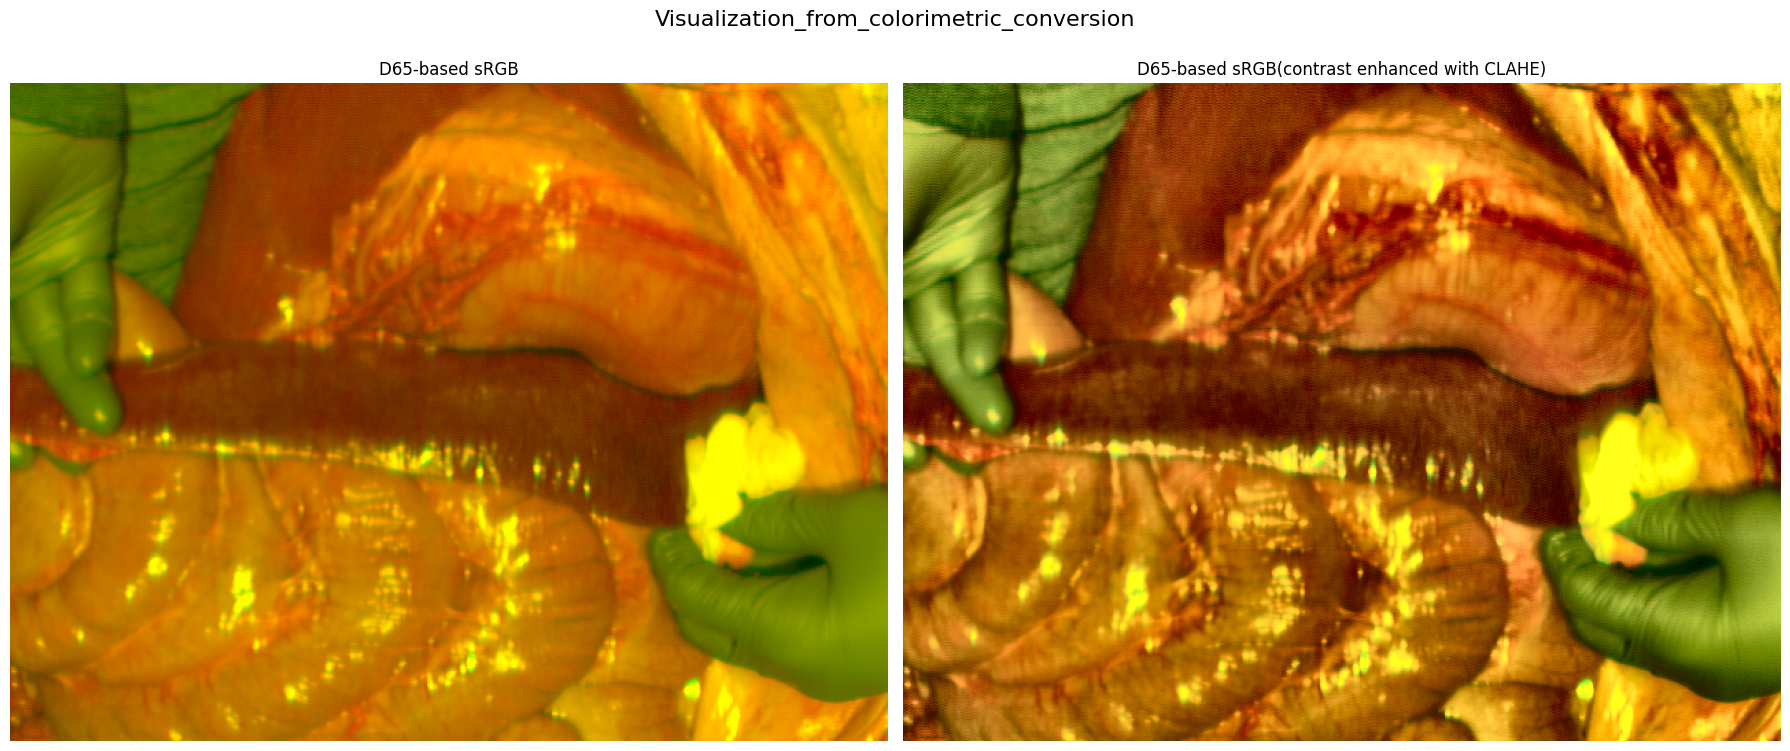

In [4]:
color_display_images = colorimetric_visualization(input_path,
                                                    stretch_percent=2,
                                                    illuminant='D65',
                                                    visualize=True,
                                                    saveimages=True,
                                                    savefolder = None)

In [5]:
import matplotlib.pyplot as plt
def observe_hist_of_rgb_channels(rgb_image: np.ndarray, 
                                 title: str ,
                                 saveimages: bool = True, 
                                 savefolder: Optional[Path] = None) -> None:
    """
    Observe the histogram of the RGB channels of the given image.

    Parameters:
    rgb_image: the RGB image
    saveimages: whether to save the plot as an image
    savefolder: the folder to save the image

    """
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    for i, color in enumerate(['Red', 'Green', 'Blue']):
        ax[i].hist(rgb_image[:, :, i].ravel(), bins=256, color=color.lower(), alpha=0.7)
        ax[i].set_title(f'{color} channel')
    fig.suptitle(f'Histogram of r/g/b in {title}')
    if saveimages:
        savefolder.mkdir(parents=True, exist_ok=True)
        plt.savefig(savefolder / 'histogram_of_rgb_channels.png')
    plt.show()

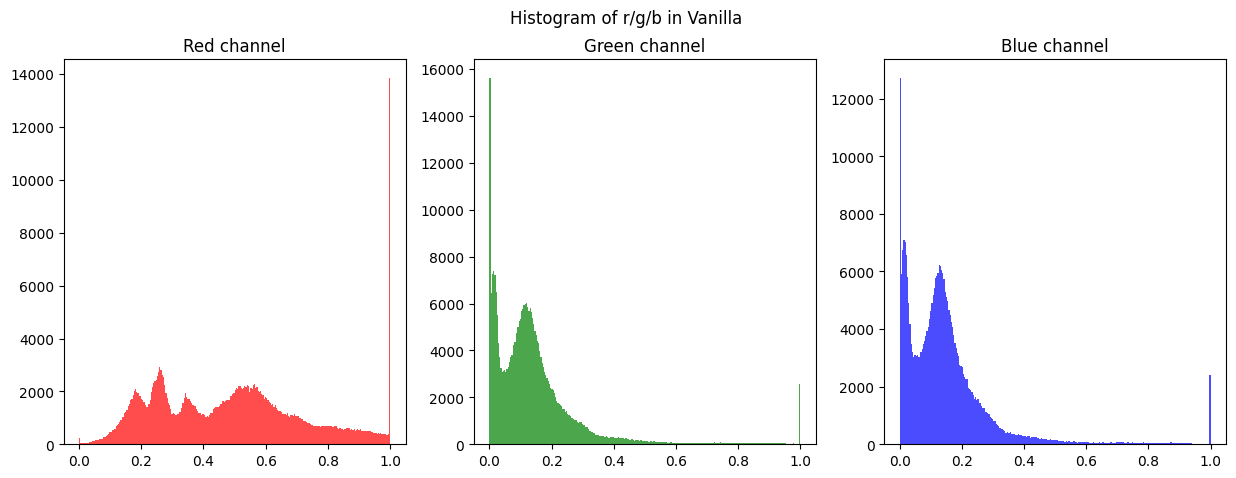

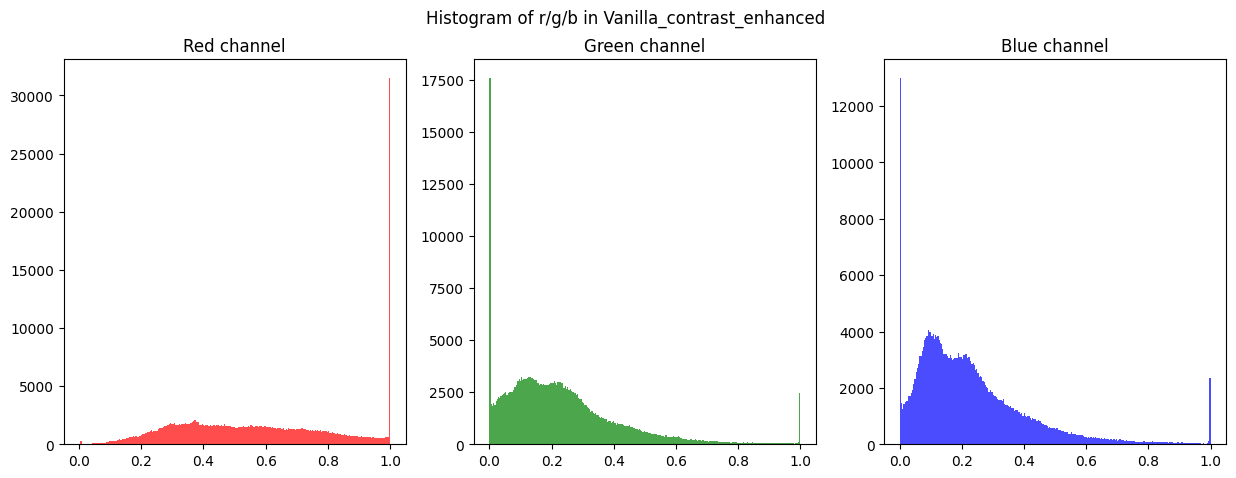

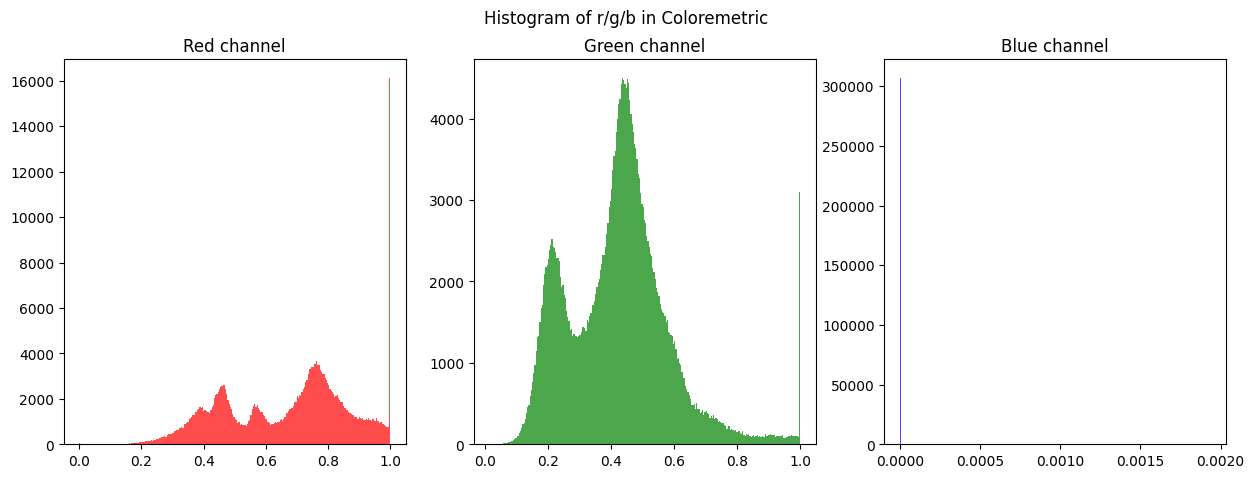

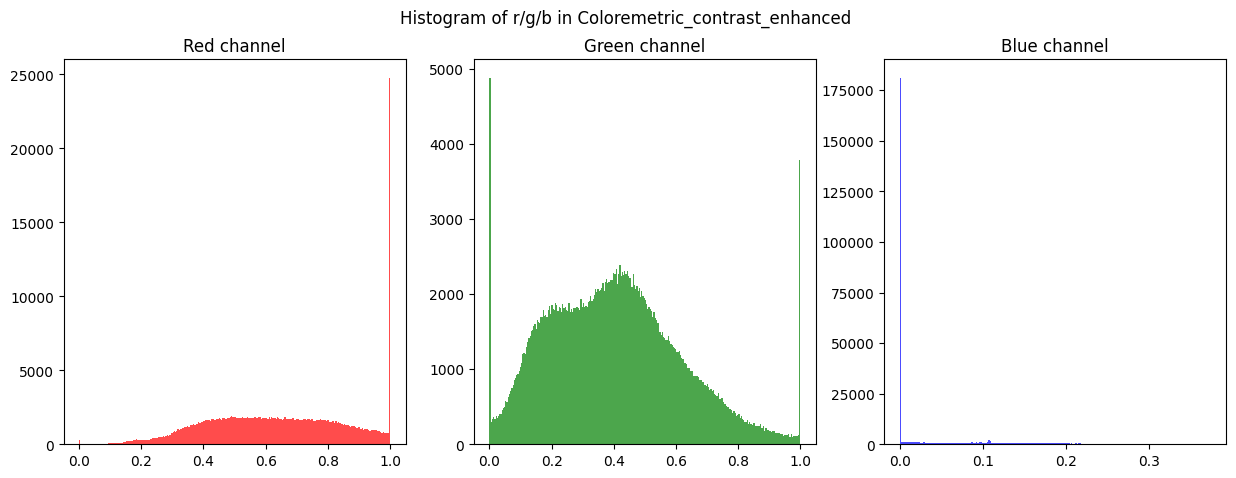

In [6]:
titles = ['Vanilla', 'Vanilla_contrast_enhanced']
for i, display_image in enumerate(rgb_display_images):
    observe_hist_of_rgb_channels(display_image, titles[i], saveimages=False, savefolder=None)

titles = ['Coloremetric', 'Coloremetric_contrast_enhanced']
for i, display_image in enumerate(color_display_images):
    observe_hist_of_rgb_channels(display_image, titles[i], saveimages=False, savefolder=None)

### **Discussion**  

The [Heidelberg Porcine HyperSPECTRAL Imaging Dataset](https://heiporspectral.org/) covers spectral data from **500 nm to 1000 nm** with a resolution of approximately **5 nm per band**. This dataset presents challenges for accurate color visualization due to the **absence of wavelengths below 500 nm**, which are critical for reproducing blue tones.


#### **Key Findings: Vanilla RGB Visualization vs. Colorimetric Method**

| **Aspect**                     | **Vanilla RGB Visualization**                                             | **Colorimetric Method**                                             |
|--------------------------------|----------------------------------------------------------------------------|----------------------------------------------------------------------|
| **Blue Channel Handling**       | Approximates blue using bands between **530–560 nm**                      | Attempts to reconstruct blue from **450–495 nm** (absent in dataset) |
| **Output Appearance**           | Acceptable, but with **simplified color reproduction**                    | Appears **yellowish** due to missing blue-sensitive bands            |
| **Spectral Limitation**         | Compromises based on available data                                       | **Fails to accurately reproduce blue tones** due to dataset gaps     |
| **Histogram Analysis**          | Shows balanced distribution across visible channels                      | Shows **clear data gaps in shorter wavelengths**                     |



### **Conclusion**  
The differences in visualization between the vanilla RGB method and the colorimetric method stem from the dataset's inherent limitations. The absence of shorter wavelengths (<500 nm) compromises the ability of colorimetric methods to reproduce accurate blue tones, leading to a yellowish appearance.